In [1]:
from a2_utils import *
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

In [2]:
def gauss(sigma):
    gauss_kernel = []
    for x in range(math.floor(- 3 * sigma), math.ceil(3 * sigma) + 1):
        result_x = (1 / (math.sqrt(2 * math.pi) * sigma)) * \
            math.exp(-((x ** 2) / (2 * (sigma ** 2))))
        gauss_kernel.append(result_x)
    return np.array(gauss_kernel) / sum(gauss_kernel)

(19,) (19,)
(19,) (19,)


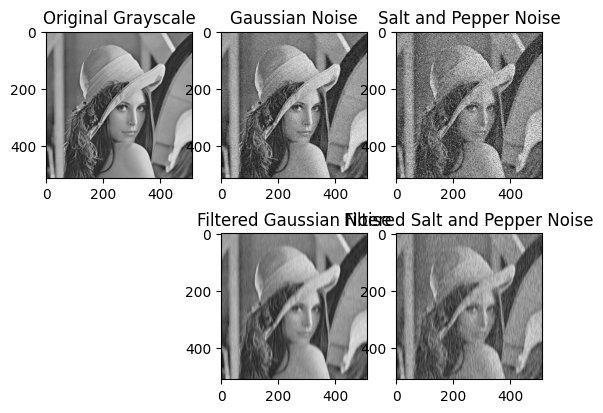

In [5]:
# (a) Write a function gaussfilter that generates a Gaussian filter and applies it to a 2-D image.

def gaussfilter(img, sigma):
    gauss_kernel = gauss(sigma)
    convolved_img = cv2.filter2D(img, -1, gauss_kernel)
    convolved_img = cv2.filter2D(convolved_img, -1, gauss_kernel.T)
    return convolved_img


original_img = cv2.imread('images/lena.png', cv2.IMREAD_GRAYSCALE) / 255
img_gauss_noise = gauss_noise(original_img)
img_sp_noise = sp_noise(original_img, 0.2)
filtered_gauss_img = gaussfilter(img_gauss_noise, 3)
filtered_sp_img = gaussfilter(img_sp_noise, 3)
plt.subplot(2, 3, 1)
plt.imshow(original_img, cmap='gray', vmin=0, vmax=1)
plt.title('Original Grayscale')
plt.subplot(2, 3, 2)
plt.imshow(img_gauss_noise, cmap='gray', vmin=0, vmax=1)
plt.title('Gaussian Noise')
plt.subplot(2, 3, 3)
plt.imshow(img_sp_noise, cmap='gray', vmin=0, vmax=1)
plt.title('Salt and Pepper Noise')
plt.subplot(2, 3, 5)
plt.imshow(filtered_gauss_img, cmap='gray', vmin=0, vmax=1)
plt.title('Filtered Gaussian Noise')
plt.subplot(2, 3, 6)
plt.imshow(filtered_sp_img, cmap='gray', vmin=0, vmax=1)
plt.title('Filtered Salt and Pepper Noise')
plt.show()

# Question: Which noise is better removed using the Gaussian filter? Gaussian Noise, because the noise
# follows a gaussian distribution, and the filter averages and smoothes the intensities, where as salt and pepper noise
# has extreme values and it might not get removed well

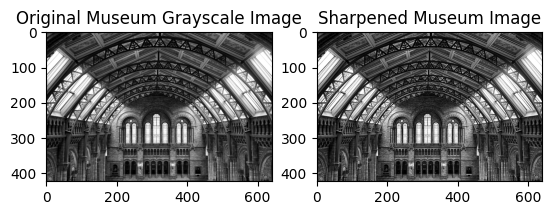

In [ ]:
# (b) Convolution can also be used for image sharpening. Look at its definition in the lecture slides and implement it.


def sharpening_filter(img):
    kernel = np.array(
        [[-1/9, -1/9, -1/9], [-1/9, 2-1/9, -1/9], [-1/9, -1/9, -1/9]])
    sharpened_img = cv2.filter2D(img, -1, kernel)
    return sharpened_img


orig_museum_img = cv2.imread('images/museum.jpg', cv2.IMREAD_GRAYSCALE)
sharpened_museum_img = sharpening_filter(orig_museum_img)
plt.subplot(1, 2, 1)
plt.imshow(orig_museum_img, cmap='gray')
plt.title("Original Museum Grayscale Image")
plt.subplot(1, 2, 2)
plt.imshow(sharpened_museum_img, cmap='gray')
plt.title("Sharpened Museum Image")
plt.show()

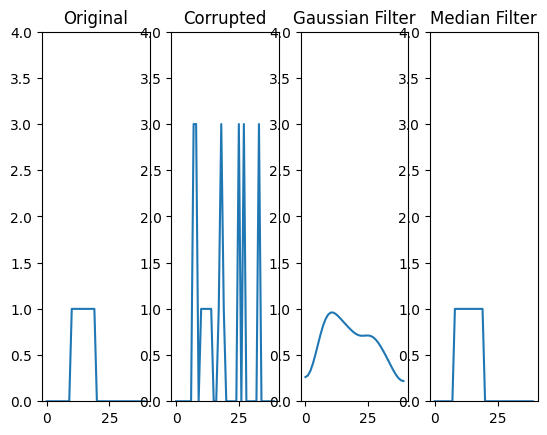

In [ ]:
# (c) Implement a simple median filter as a function simple_median that takes
# the input signal I and the filter width w and returns the filtered signal.


def add_sp_noise(signal, percent=.1):
    noisy_signal = signal.copy()
    # Calculate the number of points to be affected by noise
    num_noise_points = int(percent * len(signal))
    # Generate random indices for salt noise
    salt_indices = np.random.choice(
        len(signal), size=num_noise_points, replace=False) # repalce=falce -> choose unique values
    # Set the values at salt indices to the maximum value
    noisy_signal[salt_indices] = 3
    # Generate random indices for pepper noise
    pepper_indices = np.random.choice(
        len(signal), size=num_noise_points, replace=False)
    # Set the values at pepper indices to the minimum value
    noisy_signal[pepper_indices] = 0

    return noisy_signal


def simple_median(signal, width):
    middle = width // 2
    filtered_signal = []
    for i in range(len(signal)):
        # calculate where the window starts
        start = max(0, i - middle)
        # calculate where the  window ends
        end = min(len(signal), i + middle + 1)
        # get the values that the window covers
        values = signal[start:end]
        # calculate the median of the values
        median = np.median(values)
        filtered_signal.append(median)

    return np.array(filtered_signal)


signal = np.zeros(40)
signal[10:20] = 1
corrupted_signal = add_sp_noise(signal, 0.2)
gauss_filtered_signal = gaussfilter(corrupted_signal, 3)
median_filtered_signal = simple_median(corrupted_signal, 5)
plt.subplot(1, 4, 1)
plt.plot(signal)
plt.title("Original")
plt.ylim(0, 4)
plt.subplot(1, 4, 2)
plt.plot(corrupted_signal)
plt.title("Corrupted")
plt.ylim(0, 4)
plt.subplot(1, 4, 3)
plt.plot(gauss_filtered_signal)
plt.title("Gaussian Filter")
plt.ylim(0, 4)
plt.subplot(1, 4, 4)
plt.plot(median_filtered_signal)
plt.title("Median Filter")
plt.ylim(0, 4)
plt.show()

# Question: Which filter performs better at this specific task?
# In comparison to Gaussian filter that can be applied multiple times in any order,
# does the order matter in case of median filter? What is the name of filters like this?
# For removing salt and pepper noise, the median filter is more effective than the Gaussian filter.
# The order of applying the Gaussian filter multiple times does not matter due to its linear nature.
# The order of applying the median filter matters, and filters with this property are non-linear or non-commutative filters.


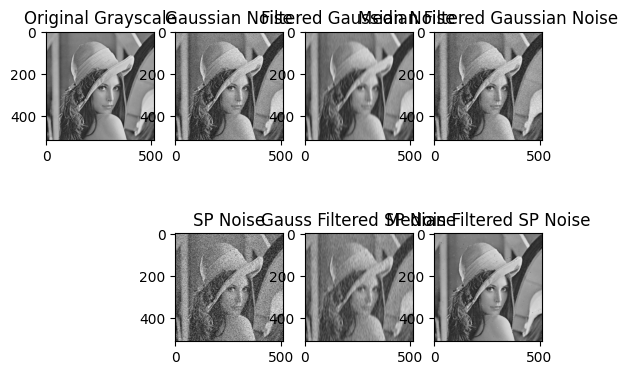

In [ ]:
# (d) Implement a 2-D version of the median filter.
# Test it on an image that was corrupted by Gaussian noise and on an image that was corrupted by salt and pepper noise.
# Compare the results with the Gaussian filter for multiple noise intensities and filter sizes.


def simple_median_2D(image, size):
    height, width = image.shape
    middle = size // 2
    filtered_image = np.zeros_like(image)

    for y in range(0, height):
        # top index of the filter window
        top = max(y - middle, 0)
        # bottom index of the filter window
        bottom = min(y + middle + 1, height)
        for x in range(0, width):
            # left index of the filter window
            left = max(x - middle, 0)
            # right index of the filter window
            right = min(x + middle + 1, width)
            # get the values that the window covers
            values = image[top:bottom, left:right]
            # set the value of the pixel to the median 
            filtered_image[y, x] = np.median(values)

    return filtered_image


# Question: What is the computational complexity of the Gaussian filter operation?
# How about the median filter? What does it depend on?
# Describe the computational complexity using the O(·) notation (you can assume n log n complexity for sorting).
# Gaussian filter: O(nk), n is the size of the image, k is the size of the kernel
# Median filter: O(nklogk), n is the size of the image, k is the size of the kernel

median_filtered_gaussian = simple_median_2D(img_gauss_noise, 3)
median_filtered_sp = simple_median_2D(img_sp_noise, 3)

plt.subplot(2, 4, 1)
plt.imshow(original_img, cmap='gray', vmin=0, vmax=1)
plt.title('Original Grayscale')
plt.subplot(2, 4, 2)
plt.imshow(img_gauss_noise, cmap='gray', vmin=0, vmax=1)
plt.title('Gaussian Noise')
plt.subplot(2, 4, 3)
plt.imshow(filtered_gauss_img, cmap='gray', vmin=0, vmax=1)
plt.title('Filtered Gaussian Noise')
plt.subplot(2, 4, 4)
plt.imshow(median_filtered_gaussian, cmap='gray', vmin=0, vmax=1)
plt.title('Median Filtered Gaussian Noise')
plt.subplot(2, 4, 6)
plt.imshow(img_sp_noise, cmap='gray', vmin=0, vmax=1)
plt.title('SP Noise')
plt.subplot(2, 4, 7)
plt.imshow(filtered_sp_img, cmap='gray', vmin=0, vmax=1)
plt.title('Gauss Filtered SP Noise')
plt.subplot(2, 4, 8)
plt.imshow(median_filtered_sp, cmap='gray', vmin=0, vmax=1)
plt.title('Median Filtered SP Noise')
plt.show()

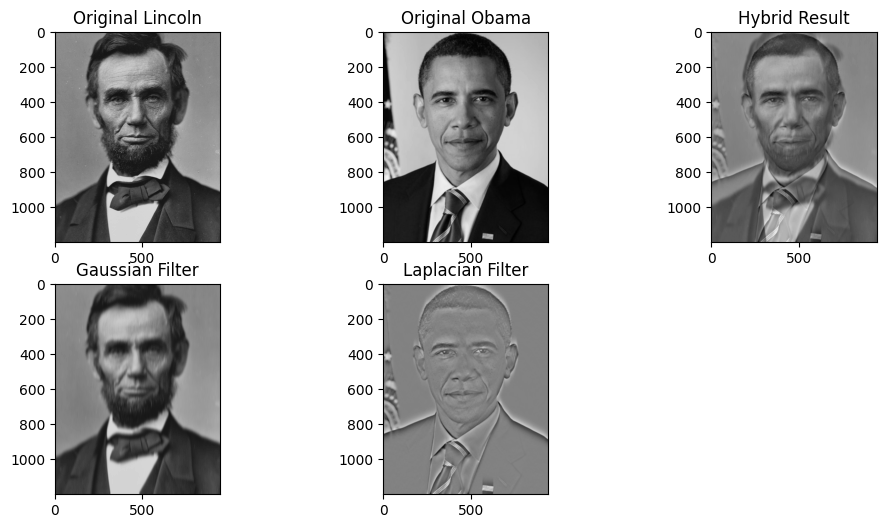

In [ ]:
# (e)  Implement the hybrid image merging that was presented at the lec- tures.
# To do this, you will have to implement the Laplacian filter.
# Filter the images (one with the Gaussian and one with the Laplacian filter) and merge them together (regular or weighted average).


def laplacian_filter(image):
    unit_impulse = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
    laplacian_image = cv2.filter2D(
        image, -1, unit_impulse) - gaussfilter(image, 18)
    return laplacian_image


obama_orig = cv2.imread('images/obama.jpg', cv2.IMREAD_GRAYSCALE) / 255
lincoln_orig = cv2.imread('images/lincoln.jpg', cv2.IMREAD_GRAYSCALE) / 255
lincoln_gauss = gaussfilter(lincoln_orig, 6)
laplace_obama_img = laplacian_filter(obama_orig)
hybrid_image = laplace_obama_img + lincoln_gauss

plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.imshow(lincoln_orig, cmap='gray', vmin=0, vmax=1)
plt.title('Original Lincoln')
plt.subplot(2, 3, 2)
plt.imshow(obama_orig, cmap='gray', vmin=0, vmax=1)
plt.title('Original Obama')
plt.subplot(2, 3, 3)
plt.imshow(hybrid_image, cmap='gray')
plt.title('Hybrid Result')
plt.subplot(2, 3, 4)
plt.imshow(lincoln_gauss, cmap='gray', vmin=0, vmax=1)
plt.title('Gaussian Filter')
plt.subplot(2, 3, 5)
plt.imshow(laplace_obama_img, cmap='gray')
plt.title('Laplacian Filter')
plt.show()
